In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from garjmcmctdem_utils import plotting_functions as plots
from garjmcmctdem_utils.misc_utils import pickle2xarray, xarray2pickle
from scipy.signal import argrelextrema
from scipy.signal import find_peaks
import gc

In [3]:
# path to file
infile = "/home/nsymington/Documents/temp/outfile.csv"

df = pd.read_csv(infile)




181361.0
p10
[  6.  12.  34.  42.  56.  62.  66.  74.  80.  84.  92.  96. 100. 108.
 120. 154. 158. 168. 188. 214. 232. 238. 242. 250. 260. 266. 270. 284.
 294. 312. 334. 354. 372. 376.]
p50
[ 10.  14.  30.  46.  68.  92. 100. 110. 118. 128. 132. 150. 166. 180.
 190. 194. 198. 206. 216. 226. 234. 238. 244. 252. 260. 266. 270. 274.
 282. 286. 290. 296. 300. 304. 314. 328. 334. 344. 350. 354. 358. 362.
 366. 370. 374. 386. 390.]
p90
[ 12.  16.  26.  30.  44.  60.  66.  74.  82.  90.  94.  98. 102. 110.
 114. 120. 126. 134. 154. 166. 174. 192. 200. 214. 224. 230. 234. 242.
 246. 250. 260. 266. 276. 282. 286. 294. 298. 302. 312. 316. 322. 338.
 342. 346. 350. 362. 370. 376. 380.]


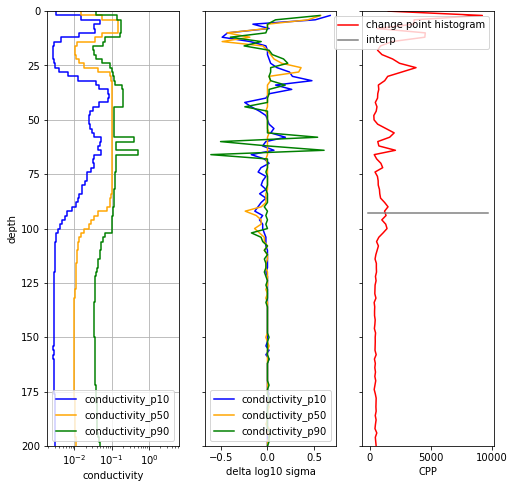

In [5]:
# create a conductivity plot

colours = {'p10': 'blue', 'p50': 'orange', 'p90': 'green'}

for index, row in df.iterrows():

    fid = row['fiducial']

    line = row["SURVEY_LINE"]

    interp_depth = row['DEPTH']

    infile = "/home/nsymington/Documents/GA/dash_data_Surat/section_data_rj/{}.pkl".format(line)

    xr = pickle2xarray(infile)

    min_ind = np.argmin(np.abs(xr['fiducial'].values - fid))

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (8,8), sharey = True)
    print(fid)
    for item in ['p10', 'p50', 'p90']:
        var_name = "_".join(["conductivity", item])
        cond = xr[var_name][:,min_ind].values
        depth = xr['layer_top_depth'][:,min_ind].values
        cond_expanded, depth_expanded = plots.profile2layer_plot(cond, depth)
        ax1.plot(cond_expanded, depth_expanded, c = colours[item],label = var_name)



        # plot the gradients
        gradient = np.log10(cond[1:]) - np.log10(cond[:-1])

        ax2.plot(gradient, depth[1:], c= colours[item], label = var_name)
        inds = find_peaks(-1*gradient, distance = 1)[0]
        depth_extrema = depth[inds + 1]
        nearest_extrema = depth_extrema[np.argmin(np.abs(depth_extrema - interp_depth))]
        print(item)
        print(depth_extrema)
        #ax2.plot([0,5], [nearest_extrema, nearest_extrema], c = colours[item],
        #         linestyle = 'dashed')

    ax1.set_xscale('log')

    ax3.plot(xr['interface_depth_histogram'][:,min_ind].values,
             xr['layer_top_depth'][:,min_ind].values, c = 'red',
             label = 'change point histogram')
    ax3.plot(ax3.get_xlim(), [interp_depth, interp_depth], c = 'grey', label = "interp")
    ax1.grid()
    ax1.legend(loc = 4)
    ax2.legend(loc = 4)
    ax3.legend()
    ax1.set_xlabel('conductivity')
    ax1.set_ylabel('depth')
    ax1.set_ylim(0., 200.)
    ax2.set_xlabel('delta log10 sigma')
    ax3.set_xlabel("CPP")
    plt.gca().invert_yaxis()
    plt.show()
    break
    plt.savefig("/home/nsymington/Documents/temp/{}_quantile_plots.png".format(fid))
    plt.close()
    gc.collect()





205